## 1. Loading the data

In [114]:
# imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

In [115]:
# load the training set
df = pd.read_csv('../Data/train.csv')

In [116]:
# understand the specs of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We have several information on the passangers and the final goal is to predict whether that passanger survived or not.

In [117]:
# get some preliminary statistics from the continuous variables
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Since the variable PassengerId it's only the PK for every passanger, it does not give us any relevant information. Let's go ahead and drop it.

In [118]:
# drop the PassangerId variable
df = df.drop(['PassengerId'], axis = 1)

## 2. Exploratory Data Analysis

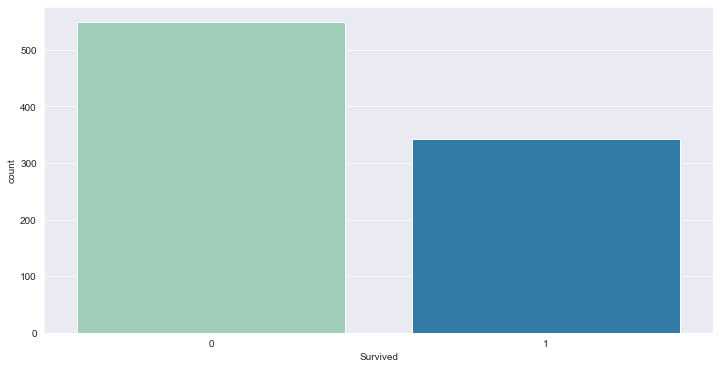

In [119]:
# check the distribution of our target variabe
plt.figure(figsize=(12,6))
sns.countplot(df['Survived'], palette='YlGnBu')

From the above countplot we can conclude that the majority of the people on board of the Titanic died (~61% of the people)

Text(0.5, 0, 'Class of the passanger')

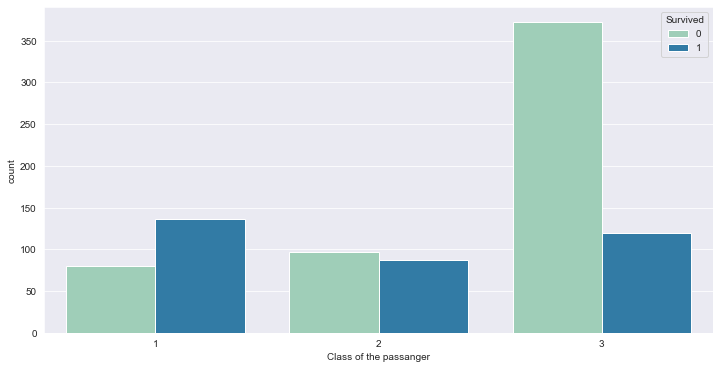

In [120]:
# let's investigate the Passangers' class
plt.figure(figsize=(12,6))
sns.countplot(df['Pclass'], hue = df['Survived'], palette='YlGnBu')
plt.xlabel('Class of the passanger')

From the above chart we can understand that people from the 1st and 2nd classes had more chance to survive. In the other hand, the majority of people in the 3rd class died. This chart can already tell us that the Pclass variable has a good predictive power.

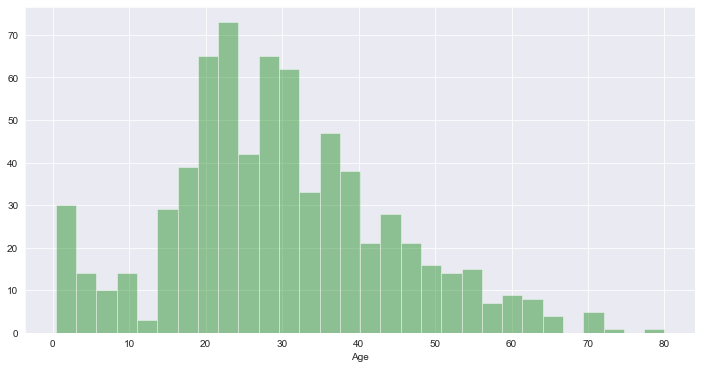

In [121]:
# let's see how is distributed
plt.figure(figsize=(12, 6))
sns.distplot(df['Age'], bins=30, color='green', kde=False)

Ok.. We can tell that the majority of people in the Titanic had between 20 and 40 years old. We can observer some extreme values though: young kids (less than 10 years old) and old people (more than 70 years old)

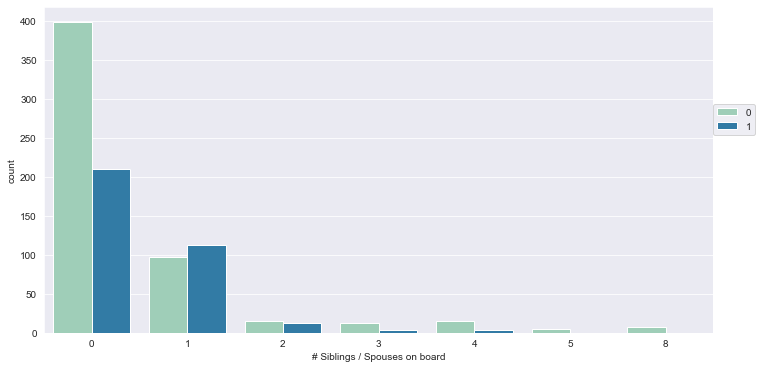

In [122]:
# let's take a look at the Number of Siblings/Spouses on board
plt.figure(figsize=(12, 6))
fig = sns.countplot(df['SibSp'], palette='YlGnBu', hue = df['Survived'])
plt.xlabel('# Siblings / Spouses on board')
fig.legend(bbox_to_anchor=(1, 0.7), loc=2, borderaxespad=0.) #Move the legend outside the plot

From the above plot we can hypothesize that the majority of the people were traveling alone. In addition to that, we can see that people with more number of siblings/spouses had more chance to die.

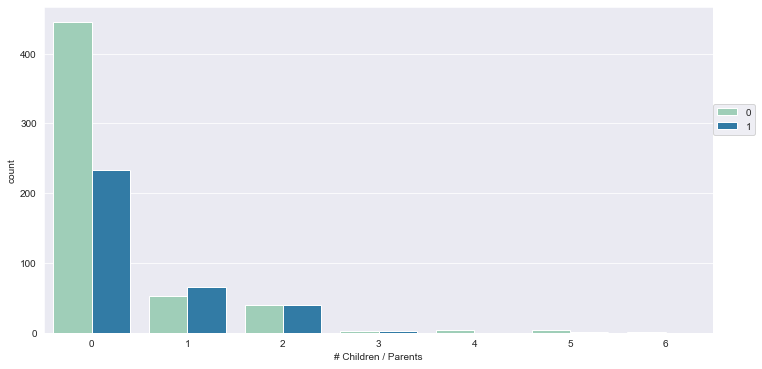

In [123]:
# let's perform a similar analysis for the number of Children/Parents
plt.figure(figsize=(12,6))
fig = sns.countplot(df['Parch'], hue = df['Survived'], palette='YlGnBu')
plt.xlabel('# Children / Parents')
fig.legend(bbox_to_anchor=(1, 0.7), loc=2, borderaxespad=0.) #Move the legend outside the plot

Unfortunately it seems that people with a higher number of children on board were more likely to die. We can hipothesize that in a big panic moment is harder to act rationally if people have more "dependents" to look after.

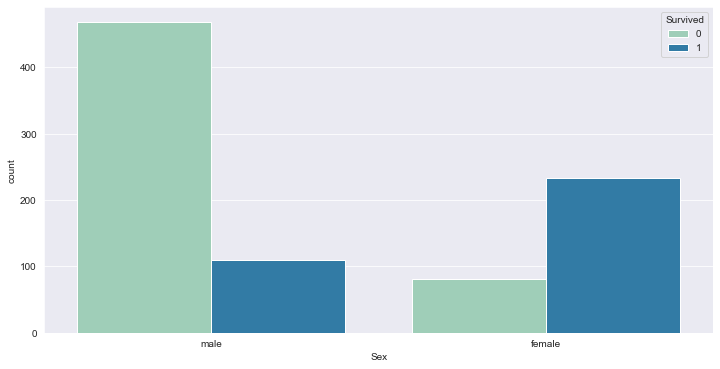

In [124]:
# let's check if there's a clear difference between genders
plt.figure(figsize=(12, 6))
sns.countplot(df['Sex'], hue = df['Survived'], palette='YlGnBu')

There were more men on board of the Titanic, and it's clear that Women were less likely to die. This can support the theory that women were given priority to escape alive.

Text(0.5, 0, 'Ticket price')

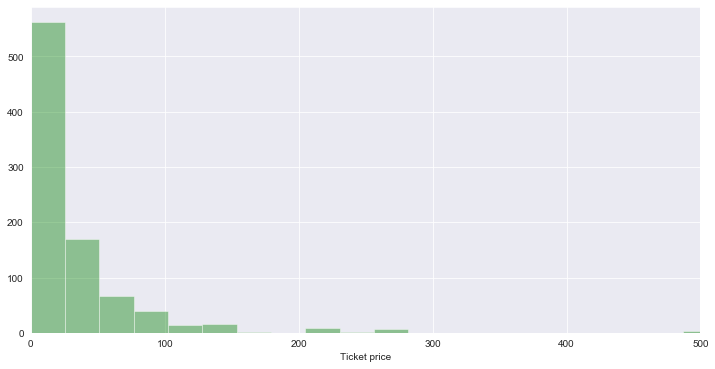

In [125]:
# let's explore the variable Fare > how much the passangers paid by the ticket
plt.figure(figsize=(12, 6))
sns.distplot(df['Fare'], bins = 20, kde = False, color = 'g')
plt.xlim([0, 500])
plt.xlabel('Ticket price')

From what we can see, most of the tickets for the Titanic costed less 50£. However, we can spot some outliers above the 200£.

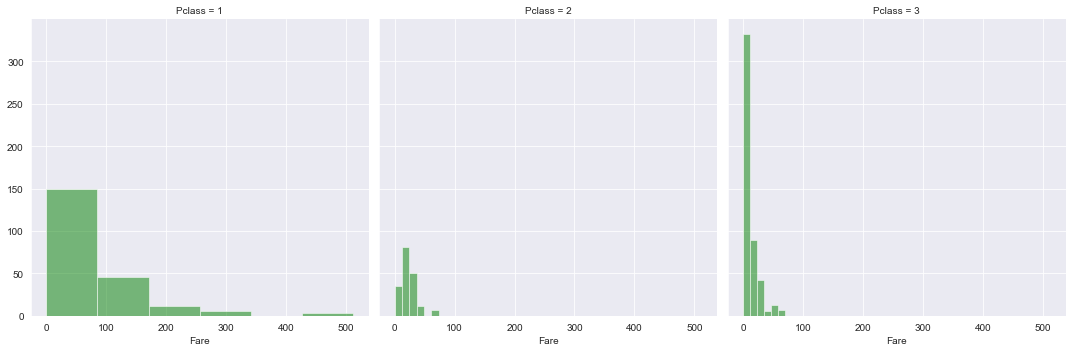

In [126]:
# let's try to understand if the tickets for higher classes were more expensive
g = sns.FacetGrid(df, col='Pclass', height=5, palette='RdBu')
g.map(plt.hist, 'Fare', bins=6, color='g', alpha=0.5)

We can conclude that on average the price paid on 1st class was higher to the price paid on 2nd and 3rd class and so on.

Text(0.5, 0, 'Port of Embarkation')

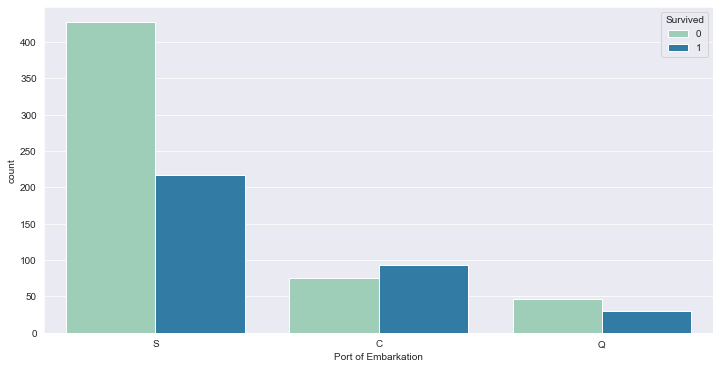

In [127]:
# finally let's try to understand where most of the people embarked
plt.figure(figsize=(12, 6))
sns.countplot(df['Embarked'], palette='YlGnBu', hue=df['Survived'])
plt.xlabel('Port of Embarkation')

We can obserbe that majority of people embarked in Southampton, followed by Cherbourg and only a minority embarked in Queenstown. We can also conclude that the people that embarked at the port of Cherbourg were more likely to survive compared to the others ports. We can try to understand if the people that embarked in Cherbourg were in higher classes - richer people.

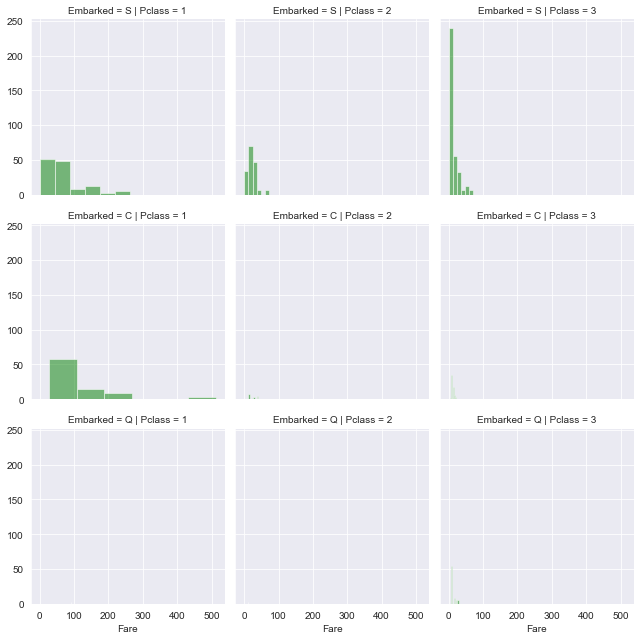

In [128]:
# let's try to understand if the people that embarked in Cherbourg were in higher classes - richer people.
g = sns.FacetGrid(df, col='Pclass', row='Embarked',height=3, palette='RdBu')
g.map(plt.hist, 'Fare', bins=6, color='g', alpha=0.5)

So, based on the above chart we can validade our hypothesis since the majority of people that embarked in Cherbourg were in the 1st class.

## 3. Data Preprocessing

In [129]:
# let's go thorugh our columns to understand what should be fixed and what we can improve
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### 3.1. Dealing with missing data

In [130]:
# let's start by checking which features contain missing values
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

As we can see the features Age Cabin and Embarked contain missing values. The next step is to go thorough each one and decide if we should fill the values by using any imputation method or if we should drop the rows/column.

###### 1. Embarked

In [131]:
# since we only have 2 records missing let's take a look
df[df['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


I tried to search on google to see if we were lucky and I found both passangers (both survived) with the information where they embarked > both in Southampton - [Miss Amelie Icard](https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html) and [Mrs. Martha Evelyn Stone](https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html)

In [132]:
# let's fill the Embarked feature with the correct values
df['Embarked'].loc[[61, 829]] = 'S'

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


##### 2. Cabin

In [133]:
# let's see how many different values we have for the Cabin feature
df['Cabin'].nunique()

147

This feature appears to be really granular, let's see which kind of values we have to see if there's anything we can conclude.

In [134]:
# let's see which are the most common values for the Cabin
df['Cabin'].value_counts().sort_values(ascending=False).head(15)

C23 C25 C27    4
G6             4
B96 B98        4
D              3
E101           3
C22 C26        3
F33            3
F2             3
D17            2
F G73          2
B77            2
C65            2
E121           2
E25            2
D20            2
Name: Cabin, dtype: int64

Since usually Classes in a ship are well isolated, we can hypothesize that there is a correlation between the Class of the passenger and his Cabin. Example: In 1st class the Cabins can always start with an A > let's see

In [135]:
# let's check the Cabin unique values for 1st class
df[df['Pclass']==1]['Cabin'].value_counts().sort_values(ascending=False)

B96 B98        4
C23 C25 C27    4
C22 C26        3
E67            2
C68            2
              ..
B30            1
A6             1
A34            1
B82 B84        1
D30            1
Name: Cabin, Length: 133, dtype: int64

In [136]:
# let's check the Cabin unique values for 2nd class
df[df['Pclass']==2]['Cabin'].value_counts().sort_values(ascending=False)

D       3
F2      3
F33     3
E101    3
F4      2
E77     1
D56     1
Name: Cabin, dtype: int64

In [137]:
# let's check the Cabin unique values for 3rd class
df[df['Pclass']==3]['Cabin'].value_counts().sort_values(ascending=False)

G6       4
F G73    2
E121     2
F E69    1
E10      1
F G63    1
F38      1
Name: Cabin, dtype: int64

Since the cabin feature is to granular and that a big portion of the information is already encoded in the PClass variable we will drop it.

In [138]:
# let's drop the Cabin feature
df = df.drop('Cabin', axis = 1)

###### 3. Age

In [139]:
# let's start by understanding the percentage of missings in Age feature
round((len(df[df['Age'].isnull()]) / len(df))*100, 2)

19.87

In [140]:
# let's see if the Name feature gives us any kind of relevant information
df['Name'].value_counts().sort_values(ascending=False).head(10)

Harknett, Miss. Alice Phoebe                        1
Chip, Mr. Chang                                     1
Asplund, Miss. Lillian Gertrud                      1
Hickman, Mr. Lewis                                  1
Aks, Mrs. Sam (Leah Rosen)                          1
Kenyon, Mrs. Frederick R (Marion)                   1
Nicola-Yarred, Master. Elias                        1
Guggenheim, Mr. Benjamin                            1
Mayne, Mlle. Berthe Antonine ("Mrs de Villiers")    1
Doling, Miss. Elsie                                 1
Name: Name, dtype: int64

As we can see, almost all the names have a prefix somewhere that can help us identify the seniority of the passanger. Should we try to create a new variable called "Title"? Let's give it a try!

In [141]:
# let's create a new feature called Title
df['Title'] = df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [142]:
# let's check which values we have for Title
df['Title'].value_counts().sort_values(ascending=False)

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Jonkheer          1
Ms                1
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Name: Title, dtype: int64

We were able to get all the titles from the passangers, however it would be better to group it in a less granular variable. Let's try to normalize it

In [143]:
# Normalize the titles, returning 'Mr', 'Master', 'Miss' or 'Mrs'
def replace_titles(x):
    title = x['Title']
    if title in ['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir']:
        return 'Mr'
    elif title in ['the Countess', 'Mme', 'Lady']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

In [145]:
# replace the titles, so the are normalized to 'Mr', 'Miss' and 'Mrs'
df['Title'] = df.apply(replace_titles, axis=1)

In [151]:
df[(df['Title']=='Master') & (df['Age'].isnull())]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
65,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,C,Master
159,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,S,Master
176,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,S,Master
709,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,C,Master
